<a href="https://colab.research.google.com/github/lightgen-lab/ModalWavefrontReconstruction/blob/main/Modal_Wavefront_Reconstruction_20230613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
######################################
#
# 2023-06-13
# Author: Inkyu Park
#  this code is a simulation of modal wavefront reconstruction algorithm
#
#
######################################

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time
# for square root
from numpy import sqrt as __sqrt__

In [22]:
# Calculate Root Mean Square
def rms(X):
    square = np.square(X)
    mse = square.mean()
    rmse = np.sqrt(mse)
    return rmse

In [23]:
# Modal Reconstruction
# Paper: https://doi.org/10.1364/JOSA.69.000972
# Title: Modal wave-front estimation from phase derivative measurements,
# Author: Ronald Cubalchini
# Published Year: 1979

def modal(slope_x, slope_y, x, y, n):
    r = np.zeros((n,n,1), dtype=np.float32)

    # P = slope x, Q = slope y
    p = np.reshape(slope_x, (n*n,1))
    q = np.reshape(slope_y, (n*n,1))
    pn = np.concatenate((p,q), axis=0)

    r1 = np.zeros((1, 2*n*n), dtype=np.float32)

    r2x = np.ones((1, n*n), dtype=np.float32)
    r2y = np.zeros((1, n*n), dtype=np.float32)
    r2 = np.concatenate((r2x, r2y), axis=1)

    r3x = np.zeros((1, n*n), dtype=np.float32)
    r3y = np.ones((1, n*n), dtype=np.float32)
    r3 = np.concatenate((r3x, r3y), axis=1)

    r4x = 4*x
    r4y = 4*y
    r4x = np.reshape(r4x, (1, n*n))
    r4y = np.reshape(r4y, (1, n*n))
    r4 = np.concatenate((r4x, r4y), axis=1)

    r5x = 2*y
    r5y = 2*x
    r5x = np.reshape(r5x, (1, n*n))
    r5y = np.reshape(r5y, (1, n*n))
    r5 = np.concatenate((r5x, r5y), axis=1)

    r6x = -2*x
    r6y = 2*y
    r6x = np.reshape(r6x, (1, n*n))
    r6y = np.reshape(r6y, (1, n*n))
    r6 = np.concatenate((r6x, r6y), axis=1)

    r7x = 9*(x**2)+3*(y**2)-2
    r7y = 6*x*y
    r7x = np.reshape(r7x, (1, n*n))
    r7y = np.reshape(r7y, (1, n*n))
    r7 = np.concatenate((r7x, r7y), axis=1)

    r8x = 6*x*y
    r8y = 3*(x**2)+9*(y**2)-2
    r8x = np.reshape(r8x, (1, n*n))
    r8y = np.reshape(r8y, (1, n*n))
    r8 = np.concatenate((r8x, r8y), axis=1)

    r9x = 3*(y**2)-3*(x**2)
    r9y = 6*x*y
    r9x = np.reshape(r9x, (1, n*n))
    r9y = np.reshape(r9y, (1, n*n))
    r9 = np.concatenate((r9x, r9y), axis=1)

    r10x = -6*x*y
    r10y = 3*(y**2)-3*(x**2)
    r10x = np.reshape(r10x, (1, n*n))
    r10y = np.reshape(r10y, (1, n*n))
    r10 = np.concatenate((r10x, r10y), axis=1)

    r11x = 12*x*(2*(x**2)+2*(y**2)-1)
    r11y = 12*y*(2*(x**2)+2*(y**2)-1)
    r11x = np.reshape(r11x, (1, n*n))
    r11y = np.reshape(r11y, (1, n*n))
    r11 = np.concatenate((r11x, r11y), axis=1)

    r12x = 6*x-(16*(x**3))
    r12y = 2*y*(8*(y**2)-3)
    r12x = np.reshape(r12x, (1, n*n))
    r12y = np.reshape(r12y, (1, n*n))
    r12 = np.concatenate((r12x, r12y), axis=1)

    r13x = 2*y*((12*(x**2))+(4*(y**2))-3)
    r13y = 2*x*((4*(x**2))+(12*(y**2))-3)
    r13x = np.reshape(r13x, (1, n*n))
    r13y = np.reshape(r13y, (1, n*n))
    r13 = np.concatenate((r13x, r13y), axis=1)

    r14x = 4*((x**3)-(6*x*(y**2)))
    r14y = 4*y*((y**2)-6*(x**2))
    r14x = np.reshape(r14x, (1, n*n))
    r14y = np.reshape(r14y, (1, n*n))
    r14 = np.concatenate((r14x, r14y), axis=1)

    r15x = 4*y*((y**3)-6*x*(y**2))
    r15y = -4*x*((x**2)-3*(y**2))
    r15x = np.reshape(r15x, (1, n*n))
    r15y = np.reshape(r15y, (1, n*n))
    r15 = np.concatenate((r15x, r15y), axis=1)

    D =  np.concatenate((r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15), axis=0)
    E = D @ D.transpose()
    A = np.linalg.pinv(E) @ D @ pn

    coeff = A.transpose()[0]

    Z1  =  coeff[0] * 1
    Z2  =  coeff[1] * x
    Z3  =  coeff[2] * y
    Z4  =  coeff[3] * (-1+ (2*(x**2)) + (2*(y**2)))
    Z5  =  coeff[4] * (2*x*y)
    Z6  =  coeff[5] * ((-x**2) + (y**2))
    Z7  =  coeff[6] * ((-2*x) + (3*(x**3)) + (3*x*(y**2)))
    Z8  =  coeff[7] * ((-2*y) + (3*(y**3)) + (3*(x**2)*y))
    Z9  =  coeff[8] * ((-x**3) + (3*x*(y**2)))
    Z10 =  coeff[9] * ((y**3) - (3*(x**2)*y))
    Z11 =  coeff[10] * (1 - (6*(x**2)) - (6*(y**2)) + (6*(x**4)) + (12*(x**2)*(y**2)) + (6*(y**4)))
    Z12 =  coeff[11] * ((3*(x**2)) - (3*(y**2)) - (4*(x**4)) + (4*(y**4)))
    Z13 =  coeff[12] * ((-6*x*y) + (8*(x**3)*y) + (8*x*(y**3)))
    Z14 =  coeff[13] * ((x**4) - (6*(x**2)*(y**2)) + (y**4))
    Z15 =  coeff[14] * ((-4*(x**3)*y) + (4*x*(y**3)))
    ZW = Z1 + Z2 + Z3 + Z4 + Z5 + Z6 + Z7 + Z8 + Z9 + Z10 + Z11 + Z12 + Z13 + Z14 + Z15

    zw_min = np.min(ZW)
    r[:,:,0] = np.subtract(ZW, zw_min)

    return r

In [41]:
# number of zones NxN
N = 64
# wavelength (micrometer)
wl = 0.550
# wavenumber
k = 2*np.pi/wl
# how many zernike polynomial coeffcient we will consider
num_zern = 15
# number of test data
num_test = 10
# range coefficient
r_coeff = 1.0

# Zernike coefficient array
total_coeff = np.array([], dtype=np.float32)

x_slopes = np.empty((num_test, N, N, 1), dtype="float32")
zws = np.empty((num_test, N, N, 1), dtype="float32")
y_slopes = np.empty((num_test, N, N, 1), dtype="float32")

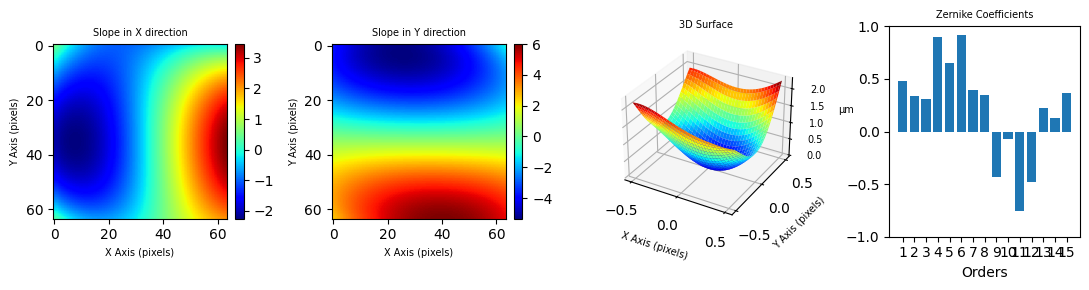

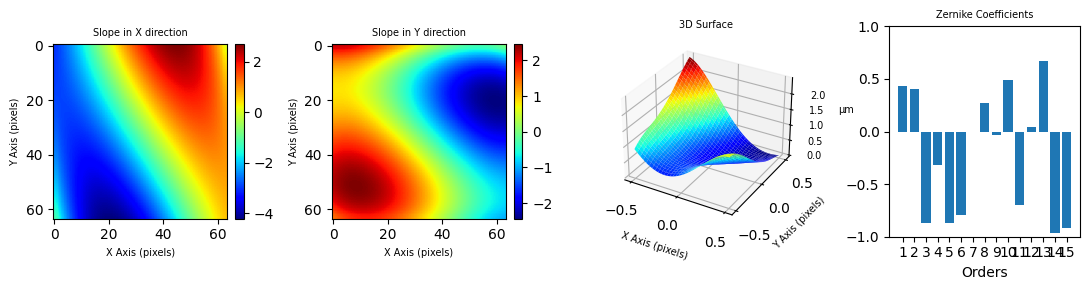

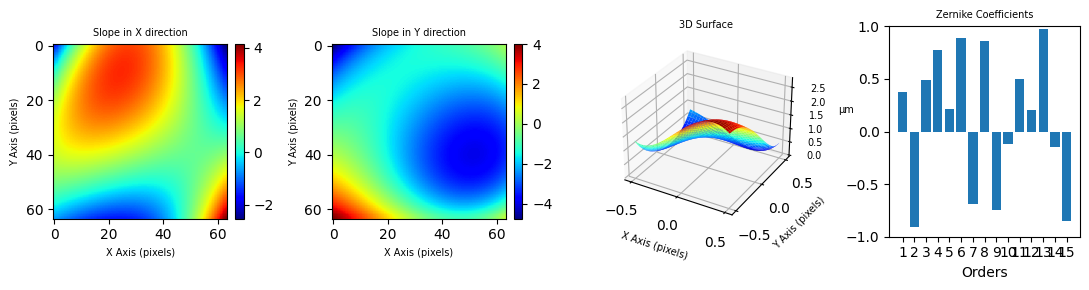

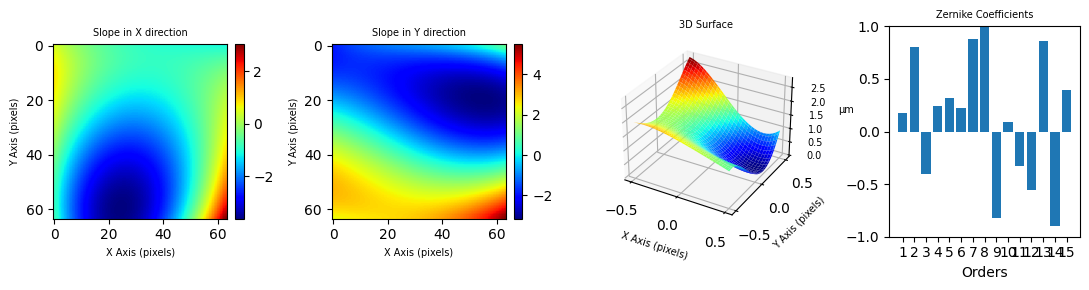

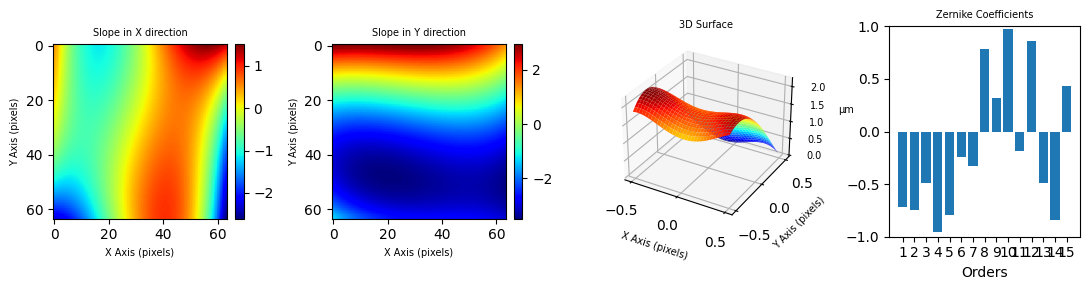

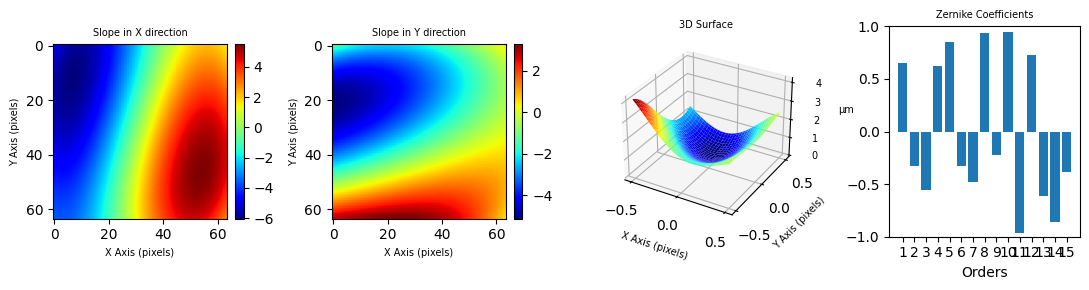

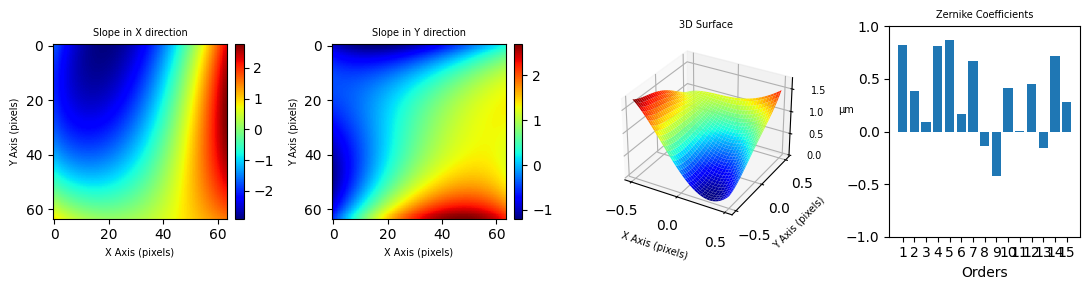

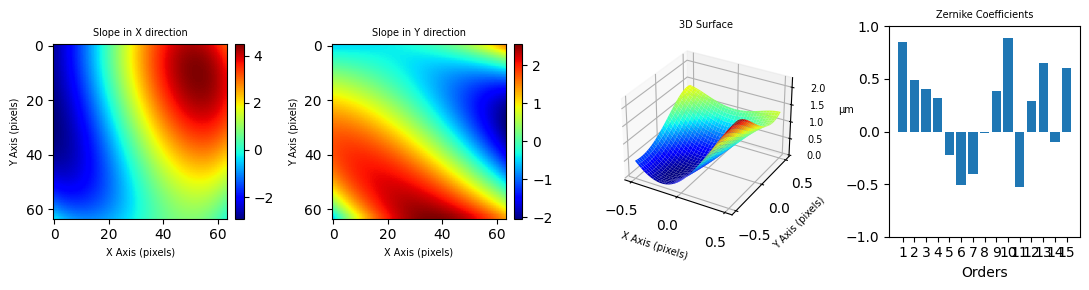

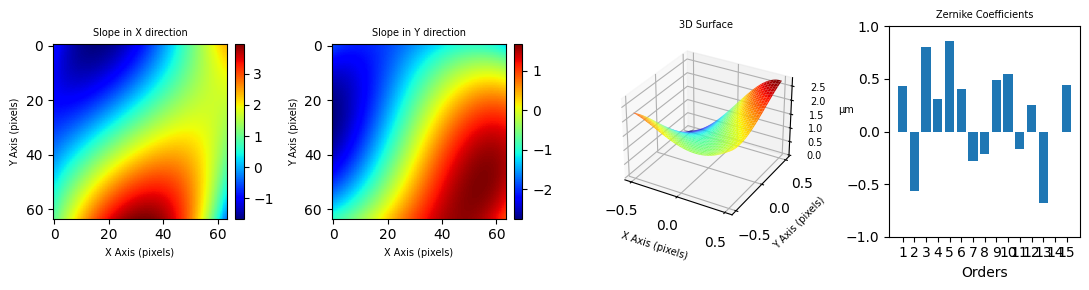

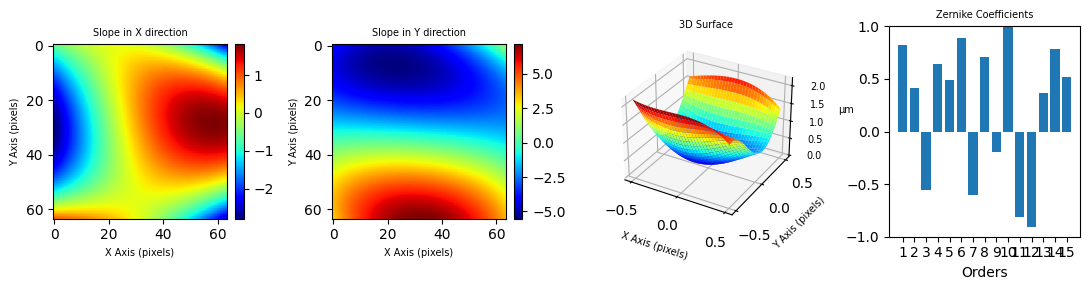

In [43]:
# randomly generated zernike coefficient for test data
for i in range(num_test):

    # [-0.5, 0.5]
    #coeff = -r_coeff + np.random.rand(num_zern)
    # [-1.0, 1.0]
    coeff = -r_coeff + 2*np.random.rand(num_zern)
    #coeff = [-4.3, 0.3, -0.03, -0.46, 0.11, -0.18, -0.04, -0.008, 0.39, 0.44, -0.22, -0.28, 0.03, 0.003, 0.49]
    total_coeff = np.append(total_coeff, coeff)

    nx, ny = (N, N)
    # unit square (here it's 1 μm x 1 μm)
    x = np.linspace(-0.5, 0.5, nx)
    y = np.linspace(-0.5, 0.5, ny)
    x, y = np.meshgrid(x, y)
    pitch = x[0,1] - x[0,0]

    # n = 0, m = 0, 1
    Z1 = coeff[0] * 1
    # n = 1, m = 1, y
    Z2 = coeff[1] * y
    # n = 1, m = -1, x
    Z3 = coeff[2] * x
    # n = 2, m = 0, -1+2x^2+2y^2
    Z4 = coeff[3] * (-1 + (2*(x**2)) + (2*(y**2)))
    # n = 2, m = -2, 2xy
    Z5 = coeff[4] * (2*x*y)
    # n = 2, m = 2, -x^2+y^2
    Z6 = coeff[5] * ((-x**2) + (y**2))
    # n = 3, m = -1, -2x+3x^3+3xy^2
    Z7 = coeff[6] * ((-2*x) + (3*(x**3)) + (3*x*(y**2)))
    # n = 3, m = 1, -2y+3y^3+3x^2y
    Z8 = coeff[7] * ((-2*y) + (3*(y**3)) + (3*(x**2)*y))
    # n = 3, m = -3, -x^3+3xy^2
    Z9 = coeff[8] * ((-x**3) + (3*x*(y**2)))
    # n = 3, m = 3, y^3-3x^2y
    Z10 = coeff[9] * ((y**3) - (3*(x**2)*y))
    # n = 4, m = 0, 1-6x^2-6y^2+6x^4+12x^2y^2+6y^4
    Z11 = coeff[10] * (1 - (6*(x**2)) - (6*(y**2)) + (6*(x**4)) + (12*(x**2)*(y**2)) + (6*(y**4)))
    # n = 4, m = 2, 3x^2-3y^2-4x^4+4y^4
    Z12 = coeff[11] * ((3*(x**2)) - (3*(y**2)) - (4*(x**4)) + (4*(y**4)))
    # n = 4, m = -2, -6xy+8x^3y+8xy^3
    Z13 = coeff[12] * ((-6*x*y) + (8*(x**3)*y) + (8*x*(y**3)))
    # n = 4, m = 4, x^4-6x^2y^2+y^4
    Z14 = coeff[13] * ((x**4) - (6*(x**2)*(y**2)) + (y**4))
    # n = 4, m = -4, -4x^3y+4xy^3
    Z15 = coeff[14] * ((-4*(x**3)*y) + (4*x*(y**3)))

    ZW = Z1+Z2+Z3+Z4+Z5+Z6+Z7+Z8+Z9+Z10+Z11+Z12+Z13+Z14+Z15

    x_bar = np.array(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])

    # slope x and y
    slope_y, slope_x = np.gradient(ZW, pitch, pitch, edge_order=1)
    x_slopes[i, :, :, 0] = slope_x[:]
    y_slopes[i, :, :, 0] = slope_y[:]

    # ground truth
    zw_min = np.min(ZW)
    zw = np.subtract(ZW, zw_min)
    zws[i, :, :, 0] = zw[:]

    #print(f'generated test image:{i}')

    #print(coeff)
    fs = 7

    fig = plt.figure(tight_layout=True, figsize=(11,3))
    gs = gridspec.GridSpec(1, 4)

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_title("Slope in X direction", fontsize=fs)
    im1 = ax1.imshow(x_slopes[i, :, :, 0], cmap='jet')
    plt.xlabel('X Axis (pixels)', fontsize=fs)
    plt.ylabel('Y Axis (pixels)', fontsize=fs)
    fig.colorbar(im1, fraction=0.046, pad=0.04)

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.set_title("Slope in Y direction", fontsize=fs)
    im2 = ax2.imshow(y_slopes[i, :, :, 0], cmap='jet')
    plt.xlabel('X Axis (pixels)', fontsize=fs)
    plt.ylabel('Y Axis (pixels)', fontsize=fs)
    fig.colorbar(im2, fraction=0.046, pad=0.04)

    ax3 = fig.add_subplot(gs[0, 2], projection='3d')
    ax3.set_title("3D Surface", fontsize=fs)
    im3 = ax3.plot_surface(x,y,zw, cmap='jet')
    plt.xlabel('X Axis (pixels)', fontsize=fs)
    plt.ylabel('Y Axis (pixels)', fontsize=fs)
    ax3.zaxis.set_tick_params(labelsize=fs)
    ax3.set_zlabel('μm', fontsize=fs)

    ax0 = fig.add_subplot(gs[0, 3])
    ax0.set_title('Zernike Coefficients', fontsize=fs)
    bar = ax0.bar(x_bar, coeff)
    plt.xlabel('Orders')
    ax0.set_ylim([-r_coeff,r_coeff])

    plt.show()



Modal Algorithm Completed in 0.01s
Modal Algorithm Completed in 0.01s
Modal Algorithm Completed in 0.01s
Modal Algorithm Completed in 0.01s
Modal Algorithm Completed in 0.01s
Modal Algorithm Completed in 0.01s
Modal Algorithm Completed in 0.01s
Modal Algorithm Completed in 0.01s
Modal Algorithm Completed in 0.01s
Modal Algorithm Completed in 0.01s
Max PV:  0.4796
Avg PV:  0.2822
Min PV:  0.1507
Max RMS:  0.0505
Avg RMS:  0.0313
Min RMS:  0.0151
Mean Time:  0.0056


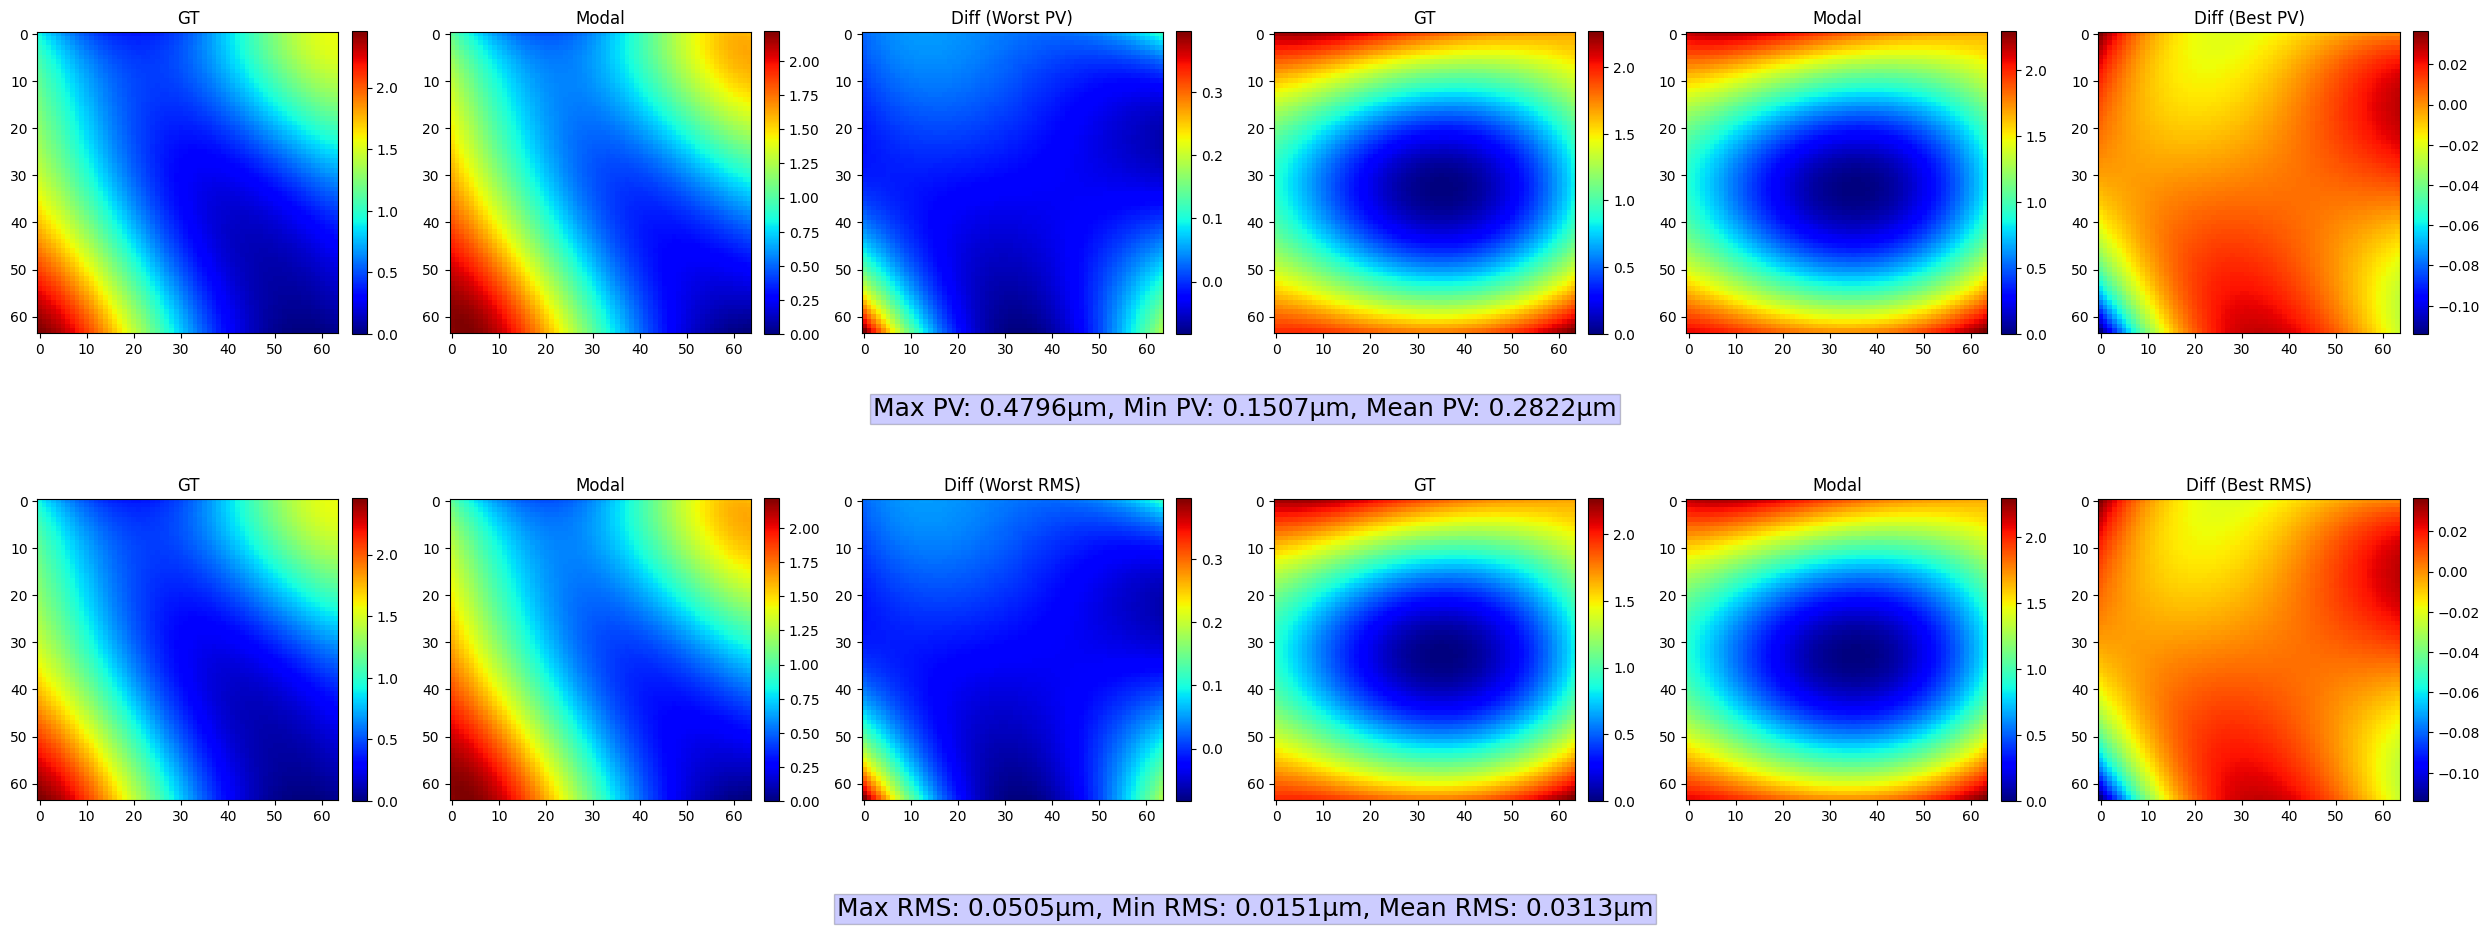

In [44]:
########################
#
# Modal Method Test
#
########################

PV_max = np.empty((1), dtype="float32")
PV_mean = np.empty((1), dtype="float32")
PV_min = np.empty((1), dtype="float32")

RMS_max = np.empty((1), dtype="float32")
RMS_mean = np.empty((1), dtype="float32")
RMS_min = np.empty((1), dtype="float32")

Rec_Time = np.empty((1), dtype="float32")

data_pv = np.zeros((num_test), dtype="float32")
data_rms = np.zeros((num_test), dtype="float32")
data_time = np.zeros((num_test), dtype="float32")

max_PV, max_PV_index = 0, 0
max_PV_Pred, max_PV_GT, max_PV_Diff = np.empty((1, N, N, 1), dtype="float32"), np.empty((1, N, N, 1), dtype="float32"), np.empty((1, N, N, 1), dtype="float32")

max_RMS, max_RMS_index = 0, 0
max_RMS_Pred, max_RMS_GT, max_RMS_Diff = np.empty((1, N, N, 1), dtype="float32"), np.empty((1, N, N, 1), dtype="float32"), np.empty((1, N, N, 1), dtype="float32")

min_PV, min_PV_index = 0, 0
min_PV_Pred, min_PV_GT, min_PV_Diff = np.empty((1, N, N, 1), dtype="float32"), np.empty((1, N, N, 1), dtype="float32"), np.empty((1, N, N, 1), dtype="float32")

min_RMS, min_RMS_index = 0, 0
min_RMS_Pred, min_RMS_GT, min_RMS_Diff = np.empty((1, N, N, 1), dtype="float32"), np.empty((1, N, N, 1), dtype="float32"), np.empty((1, N, N, 1), dtype="float32")

for i in range(num_test):

    slope_x = x_slopes[i]
    slope_y = y_slopes[i]
    zw = zws[i]

    # reconstruction by Modal algorithm
    start = time.time()

    rec_modal = modal(slope_x, slope_y, x, y, N)
    data_time[i] = time.time() - start
    print(f'Modal Algorithm Completed in {data_time[i]:.2f}s')

    # pahse diff, pv and rms
    phase_diff = np.subtract(zw, rec_modal)
    phase_diff = np.subtract(phase_diff, np.mean(phase_diff))

    pv = np.subtract(np.max(phase_diff),np.min(phase_diff))
    rmse = rms(phase_diff)

    data_pv[i] = pv
    data_rms[i] = rmse

     # get max PV
    if pv > max_PV:
        max_PV, max_PV_index, max_PV_Pred, max_PV_GT, max_PV_Diff = pv, i, rec_modal, zw, phase_diff
    # get min PV
    if min_PV <= 0:
        min_PV, min_PV_index, min_PV_Pred, min_PV_GT, min_PV_Diff  = pv, i, rec_modal, zw, phase_diff
    elif min_PV > pv:
        min_PV, min_PV_index, min_PV_Pred, min_PV_GT, min_PV_Diff = pv, i, rec_modal, zw, phase_diff

    # get max RMS
    if rmse > max_RMS:
        max_RMS, max_RMS_index, max_RMS_Pred, max_RMS_GT, max_RMS_Diff = rmse, i, rec_modal, zw, phase_diff
    # get min RMS
    if min_RMS <= 0:
        min_RMS, min_RMS_index, min_RMS_Pred, min_RMS_GT, min_RMS_Diff  = rmse, i, rec_modal, zw, phase_diff
    elif min_RMS > rmse:
        min_RMS, min_RMS_index, min_RMS_Pred, min_RMS_GT, min_RMS_Diff = rmse, i, rec_modal, zw, phase_diff

mean_PV = np.float32(np.sum(data_pv)/num_test)
mean_RMS = np.float32(np.sum(data_rms)/num_test)
Time_mean = np.mean(data_time, dtype=np.float32)

PV_max[0] = np.round(max_PV, 4)
PV_mean[0] = np.round(mean_PV, 4)
PV_min[0] = np.round(min_PV, 4)
RMS_max[0] = np.round(max_RMS, 4)
RMS_mean[0] = np.round(mean_RMS, 4)
RMS_min[0] = np.round(min_RMS, 4)
Rec_Time[0] = np.round(Time_mean, 4)

print("Max PV: ", PV_max[0])
print("Avg PV: ", PV_mean[0])
print("Min PV: ", PV_min[0])
print("Max RMS: ", RMS_max[0])
print("Avg RMS: ", RMS_mean[0])
print("Min RMS: ", RMS_min[0])
print("Mean Time: ", Rec_Time[0])

fig = plt.figure(tight_layout=True, figsize=(25,10))
gs = gridspec.GridSpec(2, 6)

plt.figtext(0.5, 0.5,
            "Max PV: " + str(PV_max[0]) + "μm, Min PV: " + str(PV_min[0]) + "μm, Mean PV: " + str(PV_mean[0]) + "μm",
            ha="center", fontsize=18,
            bbox={"facecolor":"blue", "alpha":0.2, "pad":2})

plt.figtext(0.5, 0,
            "Max RMS: " + str(RMS_max[0]) + "μm, Min RMS: " + str(RMS_min[0]) + "μm, Mean RMS: " + str(RMS_mean[0]) + "μm",
            ha="center", fontsize=18,
            bbox={"facecolor":"blue", "alpha":0.2, "pad":2})

# Worst PV
ax = fig.add_subplot(gs[0, 0])
ax.set_title("GT")
im1 = ax.imshow(max_PV_GT, cmap='jet')
fig.colorbar(im1,fraction=0.046, pad=0.04)

ax = fig.add_subplot(gs[0, 1])
ax.set_title("Modal")
im2 = ax.imshow(max_PV_Pred, cmap='jet')
fig.colorbar(im2,fraction=0.046, pad=0.04)

ax = fig.add_subplot(gs[0, 2])
ax.set_title("Diff (Worst PV)")
im3 = ax.imshow(max_PV_Diff, cmap='jet')
fig.colorbar(im3,fraction=0.046, pad=0.04)

# Worst RMS
ax = fig.add_subplot(gs[1, 0])
ax.set_title("GT")
im4 = ax.imshow(max_RMS_GT, cmap='jet')
fig.colorbar(im4,fraction=0.046, pad=0.04)

ax = fig.add_subplot(gs[1, 1])
ax.set_title("Modal")
im5 = ax.imshow(max_RMS_Pred, cmap='jet')
fig.colorbar(im5,fraction=0.046, pad=0.04)

ax = fig.add_subplot(gs[1, 2])
ax.set_title("Diff (Worst RMS)")
im6 = ax.imshow(max_RMS_Diff, cmap='jet')
fig.colorbar(im6,fraction=0.046, pad=0.04)

# Best PV
ax = fig.add_subplot(gs[0, 3])
ax.set_title("GT")
im7 = ax.imshow(min_PV_GT, cmap='jet')
fig.colorbar(im7,fraction=0.046, pad=0.04)

ax = fig.add_subplot(gs[0, 4])
ax.set_title("Modal")
im8 = ax.imshow(min_PV_Pred, cmap='jet')
fig.colorbar(im8,fraction=0.046, pad=0.04)

ax = fig.add_subplot(gs[0, 5])
ax.set_title("Diff (Best PV)")
im9 = ax.imshow(min_PV_Diff, cmap='jet')
fig.colorbar(im9,fraction=0.046, pad=0.04)

# Best RMS
ax = fig.add_subplot(gs[1, 3])
ax.set_title("GT")
im10 = ax.imshow(min_RMS_GT, cmap='jet')
fig.colorbar(im10,fraction=0.046, pad=0.04)

ax = fig.add_subplot(gs[1, 4])
ax.set_title("Modal")
im11 = ax.imshow(min_RMS_Pred, cmap='jet')
fig.colorbar(im11,fraction=0.046, pad=0.04)

ax = fig.add_subplot(gs[1, 5])
ax.set_title("Diff (Best RMS)")
im12 = ax.imshow(min_RMS_Diff, cmap='jet')
fig.colorbar(im12,fraction=0.046, pad=0.04)

plt.show()